In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
from wordcloud import WordCloud
import json
from collections import defaultdict
from sklearn import linear_model
import random
import gzip
import math

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

from difflib import SequenceMatcher

#### Data Loading

In [4]:
df =pd.read_csv(r"C:\Users\Sushant Sunder\Downloads\redditSubmissions\submissions.csv", on_bad_lines='skip')

In [5]:
df

,#image_id,unixtime,rawtime,title,total_votes,reddit_id,number_of_upvotes,subreddit,number_of_downvotes,localtime,score,number_of_comments,username
0,0,1.333172e+09,2012-03-31T12:40:39.590113-07:00,And here's a downvote.,63470.0,rmqjs,32657.0,funny,30813.0,1.333198e+09,1844.0,622.0,Animates_Everything
1,0,1.333178e+09,2012-03-31T14:16:01.093638-07:00,Expectation,35.0,rmun4,29.0,GifSound,6.0,1.333203e+09,23.0,3.0,Gangsta_Raper
2,0,1.333200e+09,2012-03-31T20:18:33.192906-07:00,Downvote,41.0,rna86,32.0,GifSound,9.0,1.333225e+09,23.0,0.0,Gangsta_Raper
3,0,1.333252e+09,2012-04-01T10:52:10-07:00,Every time I downvote something,10.0,ro7e4,6.0,GifSound,4.0,1.333278e+09,2.0,0.0,Gangsta_Raper
4,0,1.333273e+09,2012-04-01T16:35:54.393381-07:00,Downvote &quot;Dies Irae&quot;,65.0,rooof,57.0,GifSound,8.0,1.333298e+09,49.0,0.0,Gangsta_Raper
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132298,9998,1.344760e+09,2012-08-12T15:24:06-07:00,OM NOM NOM,34.0,y41wv,25.0,funny,9.0,1.344785e+09,16.0,0.0,vaggietales
132299,9998,1.345270e+09,2012-08-18T13:09:38-07:00,Don't feed the animals...,19.0,yfw66,14.0,funny,5.0,1.345295e+09,9.0,2.0,Deydria
132300,9998,1.345954e+09,2012-08-26T04:06:02+00:00,WTF worthy.,49.0,yu838,26.0,WTF,23.0,1.345954e+09,3.0,6.0,beatlesrock
132301,9998,1.346626e+09,2012-09-02T22:45:06+00:00,"Just a camel eating a kids head, welcome to th...",123.0,z91ah,65.0,WTF,58.0,1.346626e+09,7.0,12.0,v7o


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132303 entries, 0 to 132302
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   #image_id            132303 non-null  int64  
 1   unixtime             132302 non-null  float64
 2   rawtime              132302 non-null  object 
 3   title                132302 non-null  object 
 4   total_votes          132302 non-null  float64
 5   reddit_id            132302 non-null  object 
 6   number_of_upvotes    132302 non-null  float64
 7   subreddit            132302 non-null  object 
 8   number_of_downvotes  132302 non-null  float64
 9   localtime            132302 non-null  float64
 10  score                132302 non-null  float64
 11  number_of_comments   132302 non-null  float64
 12  username             112043 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 13.1+ MB


In [21]:
df.describe(include = 'all')

,#image_id,unixtime,rawtime,title,total_votes,reddit_id,number_of_upvotes,subreddit,number_of_downvotes,localtime,score,number_of_comments,username
count,132303.000000,1.323020e+05,132302,132302,132302.000000,132302,132302.000000,132302,132302.000000,1.323020e+05,132302.000000,132302.000000,112043
unique,NaN,NaN,131949,122641,NaN,132209,NaN,867,NaN,NaN,NaN,NaN,63333
top,NaN,NaN,2012-10-23T14:07:15+00:00,Haters gonna hate,NaN,1103nc,NaN,funny,NaN,NaN,NaN,NaN,Gangsta_Raper
freq,NaN,NaN,2,49,NaN,2,NaN,55277,NaN,NaN,NaN,NaN,5608
mean,10260.296441,1.340019e+09,NaN,NaN,1883.245748,NaN,1058.182900,NaN,825.062849,1.340036e+09,233.120051,39.063400,NaN
std,7317.407802,1.294615e+07,NaN,NaN,5970.693071,NaN,3181.146483,NaN,2796.540029,1.294027e+07,481.126196,142.742878,NaN
min,0.000000,1.217219e+09,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,1.217244e+09,-264.000000,-1.000000,NaN
25%,3807.000000,1.333785e+09,NaN,NaN,15.000000,NaN,8.000000,NaN,6.000000,1.333811e+09,2.000000,0.000000,NaN
50%,9041.000000,1.344574e+09,NaN,NaN,45.000000,NaN,30.000000,NaN,14.000000,1.344599e+09,16.000000,3.000000,NaN
75%,16021.000000,1.348950e+09,NaN,NaN,376.000000,NaN,276.000000,NaN,96.000000,1.348952e+09,169.000000,15.000000,NaN


In [22]:
df[['title','subreddit','username']].isnull().value_counts()

title  subreddit  username
False  False      False       112043
                  True         20259
True   True       True             1
dtype: int64

In [23]:
df.columns.tolist()

['#image_id',
 'unixtime',
 'rawtime',
 'title',
 'total_votes',
 'reddit_id',
 'number_of_upvotes',
 'subreddit',
 'number_of_downvotes',
 'localtime',
 'score',
 'number_of_comments',
 'username']

#### Exploratory Data Analysis

#### Visualizing the relationship between average votes and the number of posts per user

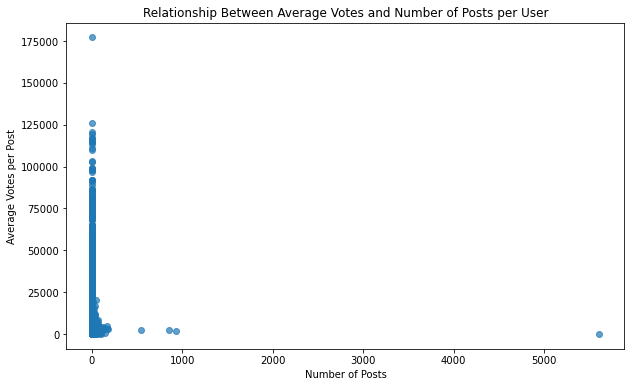

In [24]:
user_stats = df.groupby('username').agg(total_votes=('total_votes', 'sum'),num_posts=('username', 'count')).reset_index()

user_stats['avg_votes_per_post'] = user_stats['total_votes'] / user_stats['num_posts']

plt.figure(figsize=(10, 6))
plt.scatter(user_stats['num_posts'], user_stats['avg_votes_per_post'], alpha=0.7)
plt.title('Relationship Between Average Votes and Number of Posts per User')
plt.xlabel('Number of Posts')
plt.ylabel('Average Votes per Post')
plt.show()

#### Relationship between number of posts and obtained comments

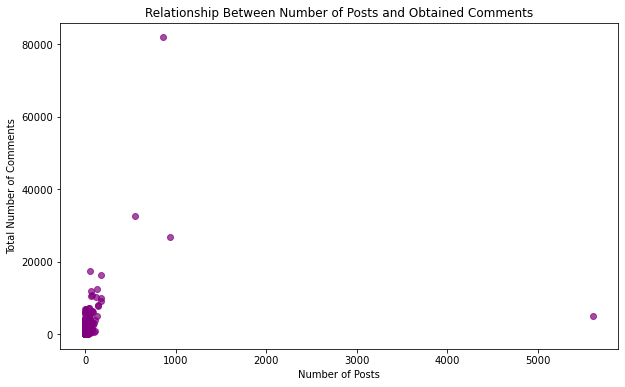

In [25]:
user_stats2 = df.groupby('username').agg(total_comments=('number_of_comments', 'sum'),num_posts=('username', 'count')).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(user_stats2['num_posts'], user_stats2['total_comments'], alpha=0.7, color='purple')
plt.title('Relationship Between Number of Posts and Obtained Comments')
plt.xlabel('Number of Posts')
plt.ylabel('Total Number of Comments')
plt.show()

#### Relationship between average comments and number of posts per user

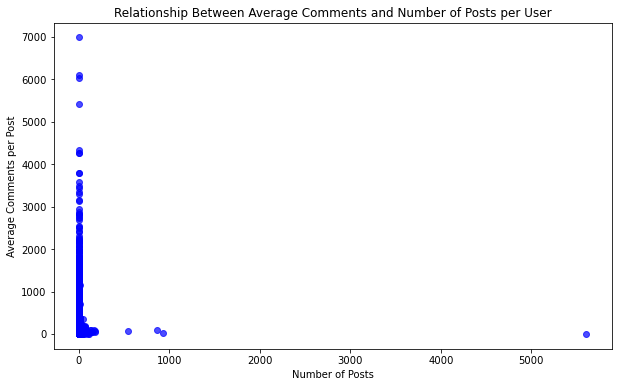

In [26]:
user_stats3 = df.groupby('username').agg(total_comments=('number_of_comments', 'sum'),num_posts=('username', 'count')).reset_index()

user_stats3['avg_comments_per_post'] = user_stats3['total_comments'] / user_stats3['num_posts']

plt.figure(figsize=(10, 6))
plt.scatter(user_stats3['num_posts'], user_stats3['avg_comments_per_post'], alpha=0.7, color='blue')
plt.title('Relationship Between Average Comments and Number of Posts per User')
plt.xlabel('Number of Posts')
plt.ylabel('Average Comments per Post')
plt.show()

#### Relationship Between Time and Comments for Top 5 Most Repeated Images

C:\Users\SUSHAN~1\AppData\Local\Temp/ipykernel_17520/3526897209.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_df['rawtime'] = pd.to_datetime(top_5_df['rawtime'], errors='coerce')


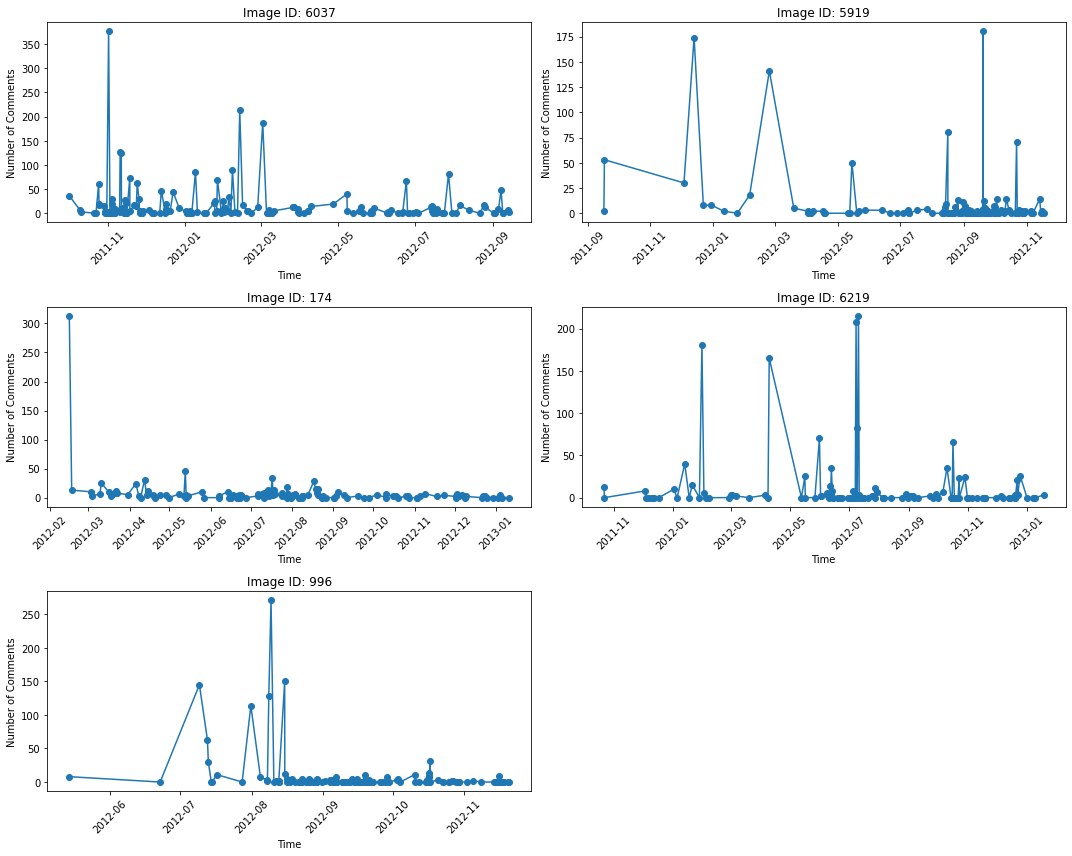

In [27]:
image_counts = df['#image_id'].value_counts().head(5)

top_5_images = image_counts.index

top_5_df = df[df['#image_id'].isin(top_5_images)]

top_5_df['rawtime'] = pd.to_datetime(top_5_df['rawtime'], errors='coerce')

plt.figure(figsize=(15, 12))

for i, image_id in enumerate(top_5_images, start=1):
    image_data = top_5_df[top_5_df['#image_id'] == image_id]
    
    image_data = image_data.sort_values('rawtime')
    
    plt.subplot(3, 2, i)  # 3 rows, 2 columns, position i
    plt.plot(image_data['rawtime'], image_data['number_of_comments'], label=f'Image ID: {image_id}', marker='o')
    plt.title(f'Image ID: {image_id}')
    plt.xlabel('Time')
    plt.ylabel('Number of Comments')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [28]:
top_images = df['#image_id'].value_counts().head(5)
top_images

6037    166
5919    130
174     127
6219    125
996     123
Name: #image_id, dtype: int64

#### Relationship Between Time and Upvotes for Top 5 Images

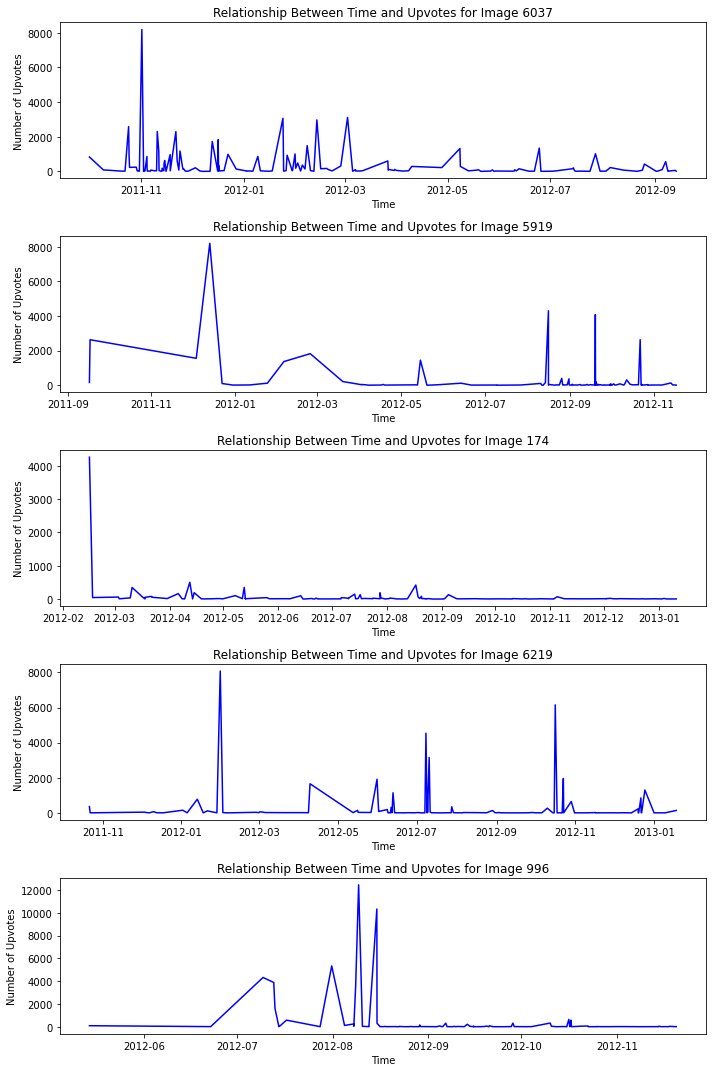

In [30]:
image_repetitions = df['#image_id'].value_counts()

top_5_images = image_repetitions.head(5).index

df['rawtime'] = pd.to_datetime(df['rawtime'], errors='coerce', utc=False)

fig, axes = plt.subplots(5, 1, figsize=(10, 15))

for i, image_id in enumerate(top_5_images):
    image_data = df[df['#image_id'] == image_id]
    
    image_data_sorted = image_data.sort_values('rawtime')

    axes[i].plot(image_data_sorted['rawtime'], image_data_sorted['number_of_upvotes'], color='blue')
    axes[i].set_title(f'Relationship Between Time and Upvotes for Image {image_id}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Number of Upvotes')

plt.tight_layout()
plt.show()

#### Relationship Between Time and Upvotes for top 5 days in 2012

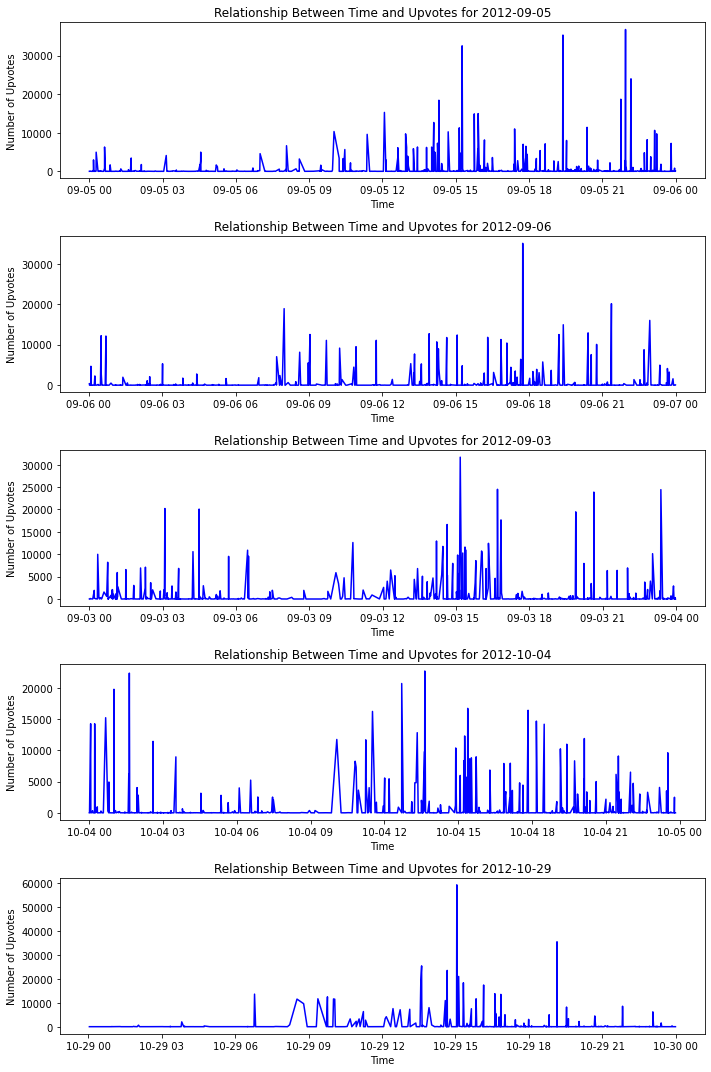

In [31]:
df['rawtime'] = pd.to_datetime(df['rawtime'], errors='coerce', utc=True)  

df['rawtime'] = df['rawtime'].dt.tz_localize(None)  

df['date'] = df['rawtime'].dt.date  

image_counts_per_day = df['date'].value_counts()

top_5_days = image_counts_per_day.head(5).index

fig, axes = plt.subplots(5, 1, figsize=(10, 15))

for i, day in enumerate(top_5_days):
    day_data = df[df['date'] == day]
    
    day_data_sorted = day_data.sort_values('rawtime')

    axes[i].plot(day_data_sorted['rawtime'], day_data_sorted['number_of_upvotes'], color='blue')
    axes[i].set_title(f'Relationship Between Time and Upvotes for {day}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Number of Upvotes')

plt.tight_layout()
plt.show()

#### Trend of upvotes on monthly basis from 2010-12

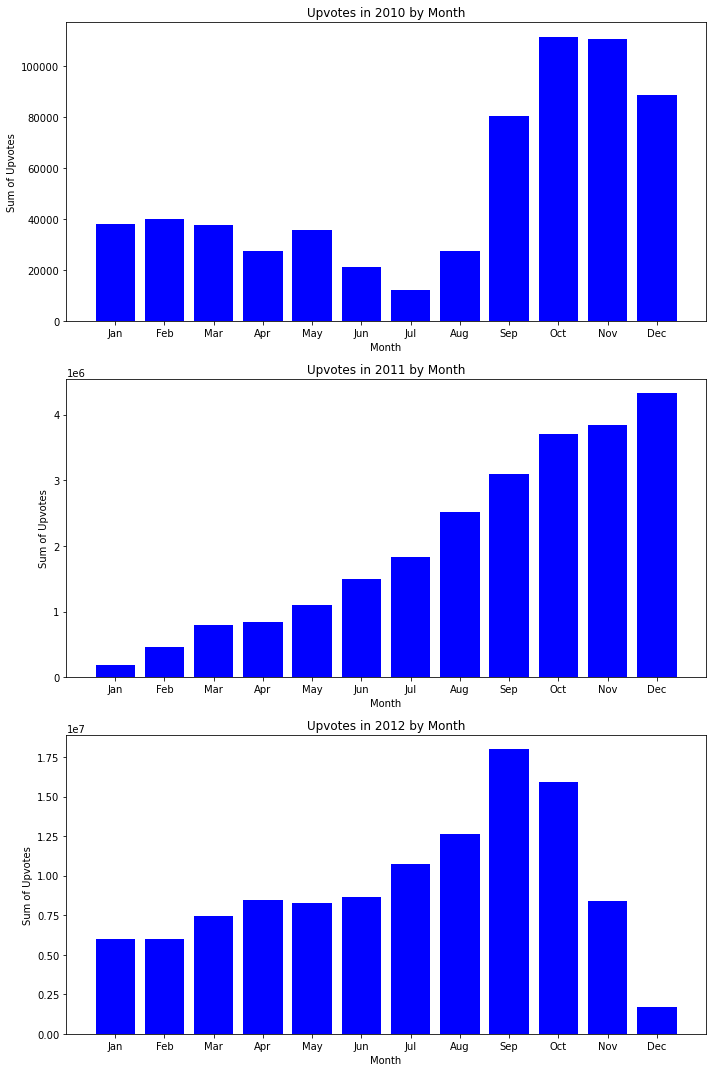

In [32]:
df['rawtime'] = pd.to_datetime(df['rawtime'], errors='coerce')
df['rawtime'] = df['rawtime'].dt.tz_localize(None) 

df['year'] = df['rawtime'].dt.year
df['month'] = df['rawtime'].dt.month

df_filtered = df[df['year'].isin([2010, 2011, 2012])]

monthly_upvotes = df_filtered.groupby(['year', 'month'])['number_of_upvotes'].sum().unstack(level=0)

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

years = [2010, 2011, 2012]
for i, year in enumerate(years):
    axes[i].bar(monthly_upvotes.index, monthly_upvotes[year], color='blue')
    axes[i].set_title(f'Upvotes in {year} by Month')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Sum of Upvotes')
    axes[i].set_xticks(monthly_upvotes.index)
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

#### Change in Upvotes from 2010 to 2012 on a daily basis

C:\Users\SUSHAN~1\AppData\Local\Temp/ipykernel_17520/2283943238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['rawtime'].dt.date


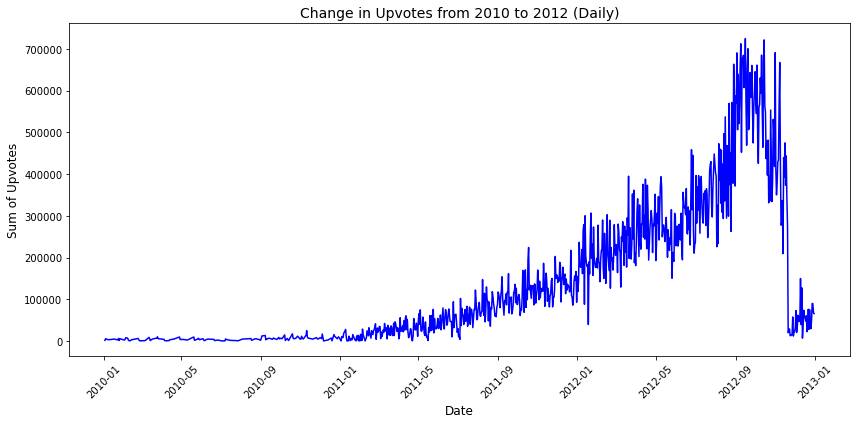

In [33]:
df_filtered = df[df['rawtime'].dt.year.isin([2010, 2011, 2012])]

df_filtered['date'] = df_filtered['rawtime'].dt.date
daily_upvotes = df_filtered.groupby('date')['number_of_upvotes'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_upvotes.index, daily_upvotes.values, color='blue')

plt.title('Change in Upvotes from 2010 to 2012 (Daily)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sum of Upvotes', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Relationship between Average Votes vs. Average Comments per User

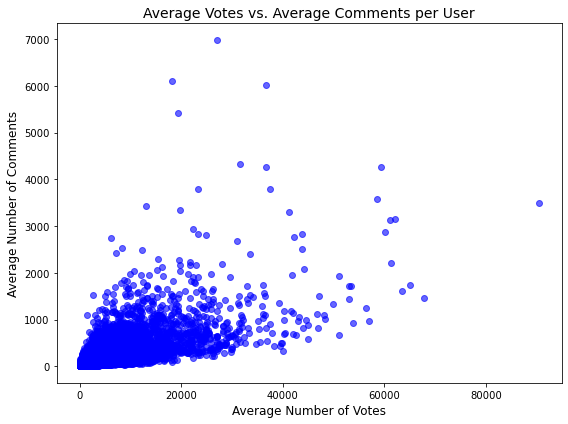

In [34]:
user_avg_votes = df.groupby('username')['number_of_upvotes'].mean()
user_avg_comments = df.groupby('username')['number_of_comments'].mean()

user_stats = pd.DataFrame({'average_votes': user_avg_votes, 'average_comments': user_avg_comments})

plt.figure(figsize=(8, 6))
plt.scatter(user_stats['average_votes'], user_stats['average_comments'], color='blue', alpha=0.6)

plt.title('Average Votes vs. Average Comments per User', fontsize=14)
plt.xlabel('Average Number of Votes', fontsize=12)
plt.ylabel('Average Number of Comments', fontsize=12)

plt.tight_layout()
plt.show()

### Modelling Exercise: Predicting the number of the comments - Data Loading

In [35]:
data = pd.read_csv(r"C:\Users\Sushant Sunder\Downloads\redditSubmissions\submissions.csv", on_bad_lines="skip")
data.fillna('', inplace=True)

Linear Regression - MSE for Comments
Training MSE: 20849.10467182912
Validation MSE: 17358.488365662608
Testing MSE: 17098.45988072729

MLP Regression - MSE for Comments
Training MSE: 8406.461508787124
Validation MSE: 23759.65835528339
Testing MSE: 21144.306914300967


#### Cumulative distribution of a dataset based on total_votes

In [55]:
data['total_votes'] = pd.to_numeric(data['total_votes'], errors='coerce')

In [56]:
data['total_votes'].fillna(0, inplace=True)

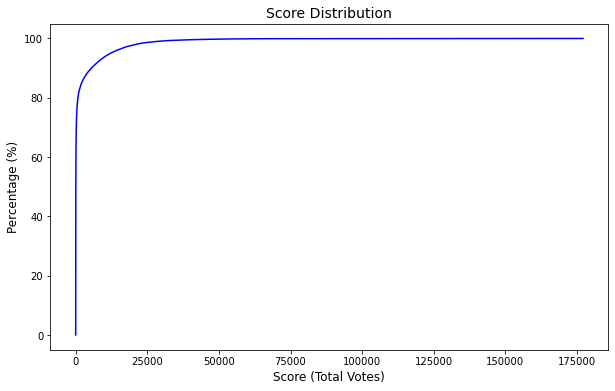

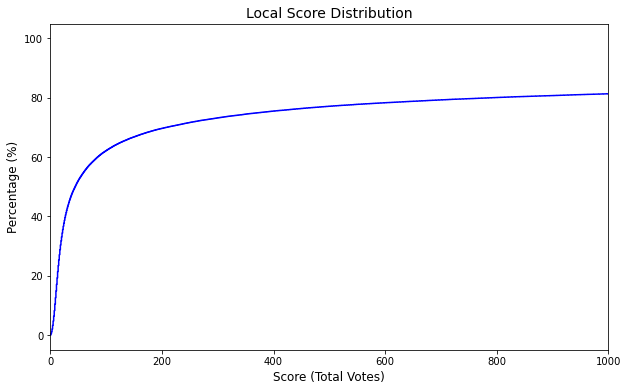

In [58]:
data_sorted = data.sort_values('total_votes')

data_sorted['cumulative_percentage'] = np.arange(1, len(data_sorted) + 1) / len(data_sorted) * 100

plt.figure(figsize=(10, 6))
plt.plot(data_sorted['total_votes'], data_sorted['cumulative_percentage'], label='Cumulative Percentage', color='blue')
plt.title("Score Distribution", fontsize=14)
plt.xlabel("Score (Total Votes)", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data_sorted['total_votes'], data_sorted['cumulative_percentage'], label='Cumulative Percentage', color='blue')
plt.xlim(0, 1000)
plt.title("Local Score Distribution", fontsize=14)
plt.xlabel("Score (Total Votes)", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.show()


#### Segmentation of Total votes in 5 different classes based on percentile score

In [57]:
percentiles = [65, 80, 90, 99]

bounds = np.percentile(data['total_votes'], percentiles)
print("Percentile Bounds:", bounds)

def assign_class(votes):
    if votes < bounds[0]:
        return 'low'
    elif votes < bounds[1]:
        return 'good'
    elif votes < bounds[2]:
        return 'high'
    elif votes < bounds[3]:
        return 'hot'
    else:
        return 'top'

data['feedback_class'] = data['total_votes'].apply(assign_class)

subreddit_counts = data.groupby(['feedback_class', 'subreddit']).size().reset_index(name='count')

top_subreddits_per_class = {}
for feedback_class in ['low', 'good', 'high', 'hot', 'top']:
    top_subreddits = (subreddit_counts[subreddit_counts['feedback_class'] == feedback_class]
                      .sort_values('count', ascending=False)
                      .head(10))
    top_subreddits_per_class[feedback_class] = top_subreddits['subreddit'].tolist()

print("Top 10 Subreddits in 5 Feedback Classes")
for i, (feedback_class, subreddits) in enumerate(top_subreddits_per_class.items()):
    print(f"Class {i} ({feedback_class}): {', '.join(subreddits)}")


Percentile Bounds: [  127.     790.    5505.4  28326.86]
Top 10 Subreddits in 5 Feedback Classes
Class 0 (low): funny, pics, WTF, gifs, GifSound, aww, atheism, gaming, reddit.com, gif
Class 1 (good): funny, gifs, pics, WTF, aww, atheism, gaming, reactiongifs, gif, AdviceAnimals
Class 2 (high): funny, pics, gifs, WTF, aww, atheism, reactiongifs, gaming, trees, AdviceAnimals
Class 3 (hot): funny, pics, WTF, gifs, aww, gaming, atheism, AdviceAnimals, reddit.com, reactiongifs
Class 4 (top): funny, pics, WTF, AdviceAnimals, aww, gaming, atheism, gifs, reddit.com, fffffffuuuuuuuuuuuu


#### Creating features for no. of comments prediction using TF-IDF and K-means clustering

In [61]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_features = tfidf_vectorizer.fit_transform(data['title'])

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_features)

def get_top_words(tfidf_vectorizer, kmeans, n_words=15):
    top_words = []
    centroids = kmeans.cluster_centers_
    terms = tfidf_vectorizer.get_feature_names()
    for i in range(kmeans.n_clusters):
        indices = centroids[i].argsort()[-n_words:][::-1]
        cluster_words = [terms[index] for index in indices]
        top_words.append((i, cluster_words))
    return top_words

top_words = get_top_words(tfidf_vectorizer, kmeans)
print("Top 15 Words in 10 Clusters")
for cluster, words in top_words:
    print(f"Cluster {cluster}: {', '.join(words)}")

Top 15 Words in 10 Clusters
Cluster 0: today, day, reddit, saw, feel, birthday, felt, got, work, cake, facebook, internet, went, ago, friend
Cluster 1: don, know, think, like, just, want, fuck, understand, say, mess, care, anymore, mind, remember, people
Cluster 2: quot, googled, google, reddit, searched, feel, post, disappointed, just, says, like, picture, posts, time, got
Cluster 3: karma, feel, comment, reddit, link, post, redditor, day, cake, felt, getting, 100, got, just, reaction
Cluster 4: really, don, happened, know, like, just, think, want, people, sure, does, cool, guy, going, did
Cluster 5: just, feel, reddit, post, cat, day, oh, gif, fuck, new, best, think, fixed, love, got
Cluster 6: like, looks, boss, look, feel, feels, reddit, heard, imagine, just, post, guys, thought, shit, people
Cluster 7: time, gets, favorite, gif, reddit, post, feel, laugh, try, makes, think, dinner, girl, just, damn
Cluster 8: dog, just, cat, friend, hot, costume, world, vs, walk, man, look, day, l

In [66]:
# Dimensionality reduction using Truncated SVD
svd = TruncatedSVD(n_components=100, random_state=42)
reduced_features = svd.fit_transform(tfidf_features)

In [67]:
# t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=250)
tsne_results = tsne.fit_transform(reduced_features)

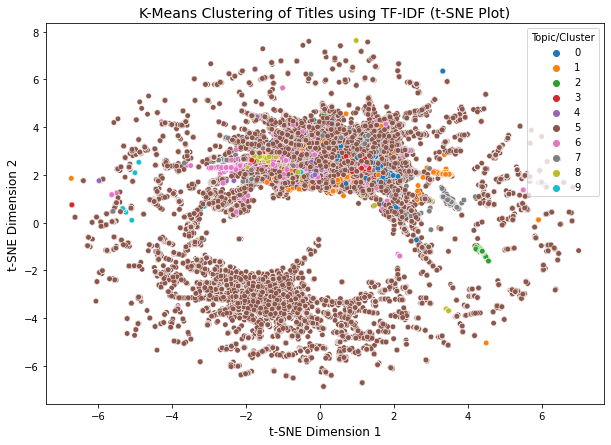

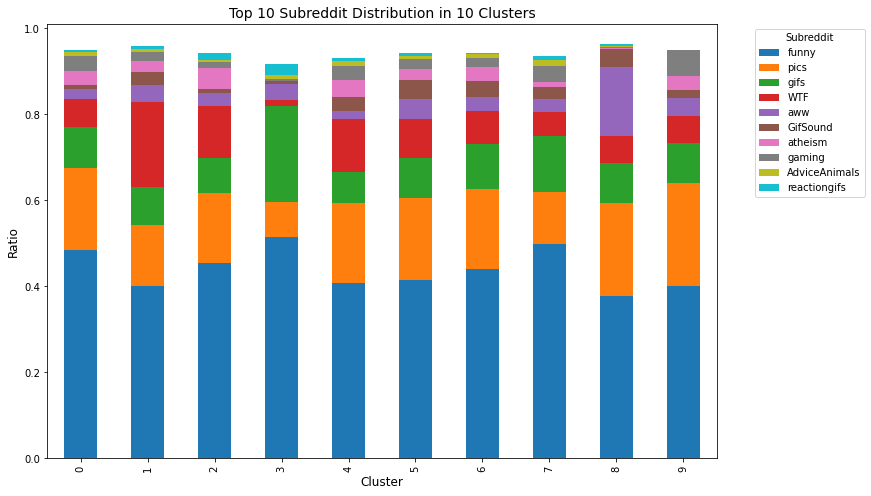

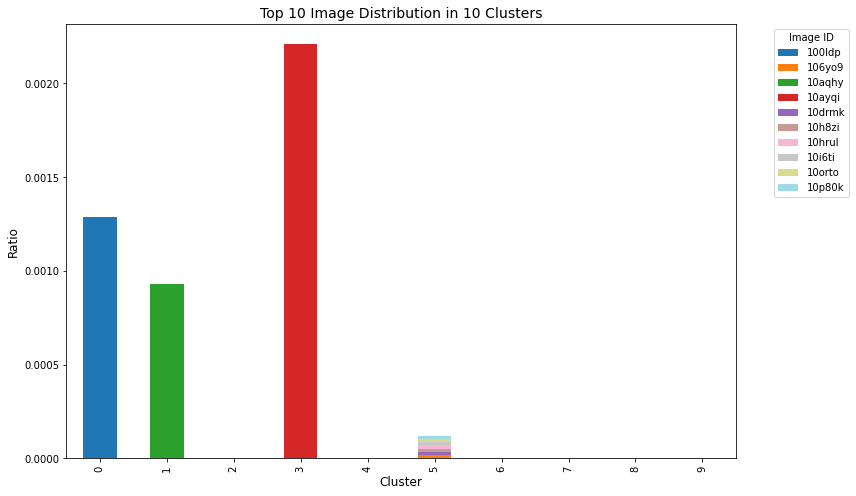

In [68]:
# t-SNE Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=kmeans_labels, palette="tab10", s=30)
plt.title("K-Means Clustering of Titles using TF-IDF (t-SNE Plot)", fontsize=14)
plt.xlabel("t-SNE Dimension 1", fontsize=12)
plt.ylabel("t-SNE Dimension 2", fontsize=12)
plt.legend(title="Topic/Cluster", loc="best")
plt.show()

# Subreddit Distribution in Clusters
data['kmeans_cluster'] = kmeans_labels
subreddit_distribution = data.groupby(['kmeans_cluster', 'subreddit']).size().unstack(fill_value=0)
top_subreddits = subreddit_distribution.sum(axis=0).nlargest(10).index 
filtered_subreddit_distribution = subreddit_distribution[top_subreddits].div(subreddit_distribution.sum(axis=1), axis=0)

filtered_subreddit_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab10')
plt.title("Top 10 Subreddit Distribution in 10 Clusters", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Ratio", fontsize=12)
plt.legend(title="Subreddit", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Image Distribution in Clusters
image_distribution = data.groupby(['kmeans_cluster', 'reddit_id']).size().unstack(fill_value=0)
top_images = image_distribution.sum(axis=0).nlargest(10).index 
filtered_image_distribution = image_distribution[top_images].div(image_distribution.sum(axis=1), axis=0)

filtered_image_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title("Top 10 Image Distribution in 10 Clusters", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Ratio", fontsize=12)
plt.legend(title="Image ID", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

#### identifying similar titles using Python's difflib module

In [70]:
grouped_data = data.groupby('reddit_id')

def find_similar_titles(titles, threshold=0.8):
    similar_titles = []
    for i, title1 in enumerate(titles):
        for j, title2 in enumerate(titles):
            if i < j: 
                similarity = SequenceMatcher(None, title1, title2).ratio()
                if similarity >= threshold:
                    similar_titles.append((title1, title2, similarity))
    return similar_titles

resubmitted_images = {}
for image_id, group in grouped_data:
    titles = group['title'].tolist()
    similar_titles = find_similar_titles(titles, threshold=0.8) 
    if similar_titles:
        resubmitted_images[image_id] = similar_titles

for image_id, similar_titles in resubmitted_images.items():
    print(f"Image ID: {image_id}")
    for title1, title2, similarity in similar_titles:
        print(f"  - \"{title1}\" is {similarity*100:.1f}% similar to \"{title2}\"")


Image ID: 100ldp
  - "My cakeday was yesterday and the campus internet was down all day, only to return around 1:00 AM today." is 100.0% similar to "My cakeday was yesterday and the campus internet was down all day, only to return around 1:00 AM today."
Image ID: 106yo9
  - "How I feel at work... everyday.." is 100.0% similar to "How I feel at work... everyday.."
Image ID: 10aqhy
  - "You don't mess with tiny hippo" is 100.0% similar to "You don't mess with tiny hippo"
Image ID: 10ayqi
  - "After loosing a shitload of Karma this week by trying to get on the front page of Reddit...." is 100.0% similar to "After loosing a shitload of Karma this week by trying to get on the front page of Reddit...."
Image ID: 10drmk
  - "how I feel while trying to write a paper" is 100.0% similar to "how I feel while trying to write a paper"
Image ID: 10h8zi
  - "How I felt realizing I missed my cakeday." is 100.0% similar to "How I felt realizing I missed my cakeday."
Image ID: 10hrul
  - "My attitude an

#### Baseline model for Predicting the number of the comments

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_title(title):
    title = ''.join(char for char in title if char.isalnum() or char.isspace())
    tokens = [stemmer.stem(word) for word in title.lower().split() if word not in stop_words]
    return ' '.join(tokens)

data['processed_title'] = data['title'].apply(preprocess_title)

vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['processed_title'])

data['number_of_comments'] = pd.to_numeric(data['number_of_comments'], errors='coerce').fillna(0)
y = data['number_of_comments'].values

model = LinearRegression()
model.fit(X, y)

feature_names = vectorizer.get_feature_names()
coefficients = model.coef_

word_weights = pd.DataFrame({'word': feature_names, 'theta': coefficients})

largest_weights = word_weights.nlargest(10, 'theta')
smallest_weights = word_weights.nsmallest(10, 'theta')

print("Top 10 Words with Largest θ:")
print(largest_weights)

print("\nTop 10 Words with Smallest θ:")
print(smallest_weights)

[nltk_data] Downloading package stopwords to C:\Users\Sushant
[nltk_data]     Sunder\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 Words with Largest θ:
        word       theta
226   design  106.874645
172  collect   96.179546
156    china   85.086437
381      gun   73.289246
660   poster   64.543428
979    worth   61.940870
587     nsfl   61.097437
854     suck   60.749029
418     holi   58.579752
268    entir   57.409785

Top 10 Words with Smallest θ:
       word      theta
743   sandi -35.365867
607  overli -32.633198
773   shark -31.634060
539     mfw -31.265249
204  cutest -29.886312
710    rest -29.003930
791    siri -28.283498
722    rise -27.219247
409    hifw -27.190019
35      ama -26.788271


#### Modelling Exercise: Predicting the number of the comments using the features from K-means, LDA, TF-IDF and time

In [72]:
# TF-IDF for titles
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_features = tfidf_vectorizer.fit_transform(data['title'])

# K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_features = kmeans.fit_transform(tfidf_features)

# LDA for topic modeling
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda_features = lda.fit_transform(tfidf_features)

# Ensure 'unixtime' is numeric and handle missing values
data['unixtime'] = pd.to_numeric(data['unixtime'], errors='coerce')
data['unixtime'].fillna(data['unixtime'].mean(), inplace=True)

# Normalize 'unixtime'
data['normalized_time'] = (data['unixtime'] - data['unixtime'].mean()) / data['unixtime'].std()

# Combine features
features = np.hstack([
    tfidf_features.toarray(),
    kmeans_features,
    lda_features,
    data[['normalized_time']].values
])

data['number_of_comments'] = pd.to_numeric(data['number_of_comments'], errors='coerce')
data['number_of_comments'].fillna(0, inplace=True)
comments = data['number_of_comments'].values

X_train, X_temp, y_train, y_temp = train_test_split(features, comments, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


lr_comments = LinearRegression()
lr_comments.fit(X_train, y_train)


train_pred_lr = lr_comments.predict(X_train)
val_pred_lr = lr_comments.predict(X_val)
test_pred_lr = lr_comments.predict(X_test)


train_mse_lr = mean_squared_error(y_train, train_pred_lr)
val_mse_lr = mean_squared_error(y_val, val_pred_lr)
test_mse_lr = mean_squared_error(y_test, test_pred_lr)


mlp = MLPRegressor(hidden_layer_sizes=(60, 40, 20), activation='relu', random_state=42, max_iter=500)
mlp.fit(X_train, y_train)


train_pred_mlp = mlp.predict(X_train)
val_pred_mlp = mlp.predict(X_val)
test_pred_mlp = mlp.predict(X_test)

train_mse_mlp = mean_squared_error(y_train, train_pred_mlp)
val_mse_mlp = mean_squared_error(y_val, val_pred_mlp)
test_mse_mlp = mean_squared_error(y_test, test_pred_mlp)


print("Linear Regression - MSE for Comments")
print(f"Training MSE: {train_mse_lr}")
print(f"Validation MSE: {val_mse_lr}")
print(f"Testing MSE: {test_mse_lr}")

print("\nMLP Regression - MSE for Comments")
print(f"Training MSE: {train_mse_mlp}")
print(f"Validation MSE: {val_mse_mlp}")
print(f"Testing MSE: {test_mse_mlp}")

Linear Regression - MSE for Comments
Training MSE: 20849.106785841377
Validation MSE: 17358.53573150788
Testing MSE: 17098.69836654238

MLP Regression - MSE for Comments
Training MSE: 8374.631529115302
Validation MSE: 24412.763839616564
Testing MSE: 21367.246077755062
